Import the necessary libraries.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt



Load the customer_value_analysis.csv into the variable customer_df.


In [3]:
customer_df=pd.read_csv('files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

First look at its main features (head, shape, info).

In [4]:
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [5]:
def r_cols(df):
    cols={}
    for i in df.columns:
        cols[i]=i.replace(' ','_').lower()
    return cols

customer_df=customer_df.rename(columns=r_cols(customer_df))

Change the type of effective_to_date column to DateTime format.

In [6]:
customer_df['effective_to_date'].apply(lambda x: dt.strptime(x,"%m/%d/%y"))

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

Check NaN values per column.

In [7]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.


In [8]:
def splitNC(df):
    return df._get_numeric_data(), df.select_dtypes('object')

Drop any ID column.

In [9]:
customer_df.drop('customer',axis=1,inplace=True)

Get the correlation matrix for the numerical variables.



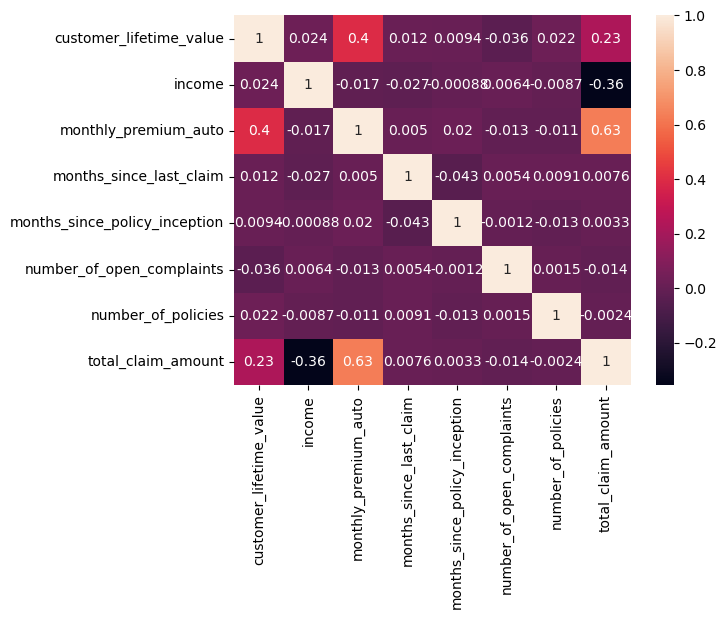

In [10]:
num,cat=splitNC(customer_df)
sns.heatmap(data=num.corr(),annot=True);

 What is the pair of numerical variables that have the highest correlation? It makes sense, why?

In [11]:
print('The pair of numerical variables with highest correlation are',tuple(num.corr().replace(1,0).max().sort_values(ascending=False).index[:2]))

The pair of numerical variables with highest correlation are ('monthly_premium_auto', 'total_claim_amount')


Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.


In [12]:
def num_split(df,vals=36):
    x=[]
    y=[]
    for c in df.columns:
        if df[c].nunique()>vals:
            x.append(c)
        else:
            y.append(c)
    return df[x],df[y]

continuous_df,discrete_df=num_split(num)

Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).


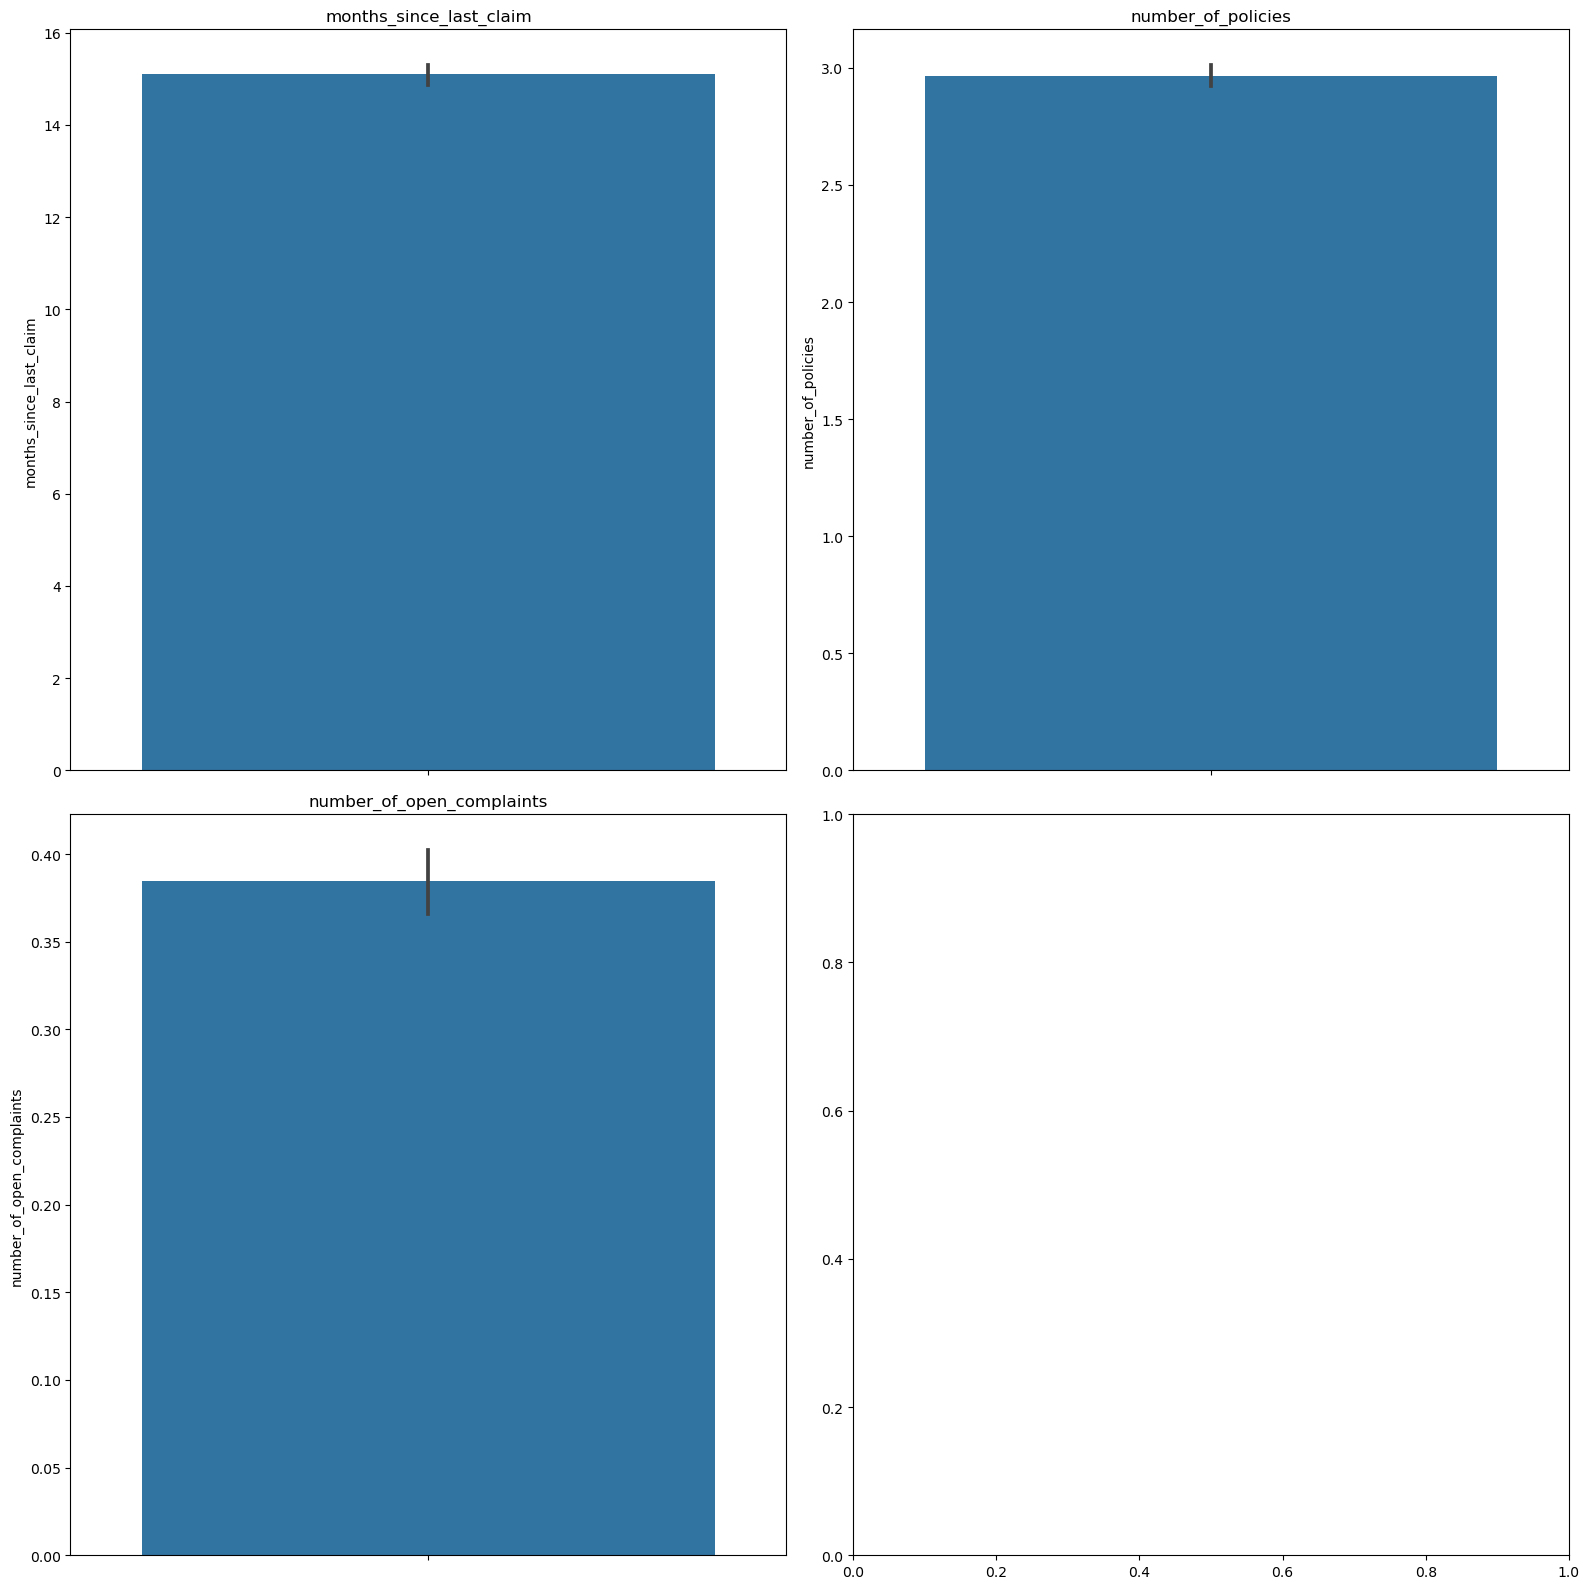

In [14]:
def barp(df,a,b):
    h=round(df.shape[1]/2+0.1)
    fig,ax=plt.subplots(h,2,figsize=(a,b))
    column_index = 0

    for c in range(2):
        for i in range(h):
            sx = sns.barplot(y=df[df.columns[column_index]], ax=ax[i,c])
            sx.set(title=df.columns[column_index])
            column_index += 1
            if column_index==df.shape[1]:
                break
    
    plt.tight_layout()
    plt.show()
    

barp(discrete_df,16,16)


Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

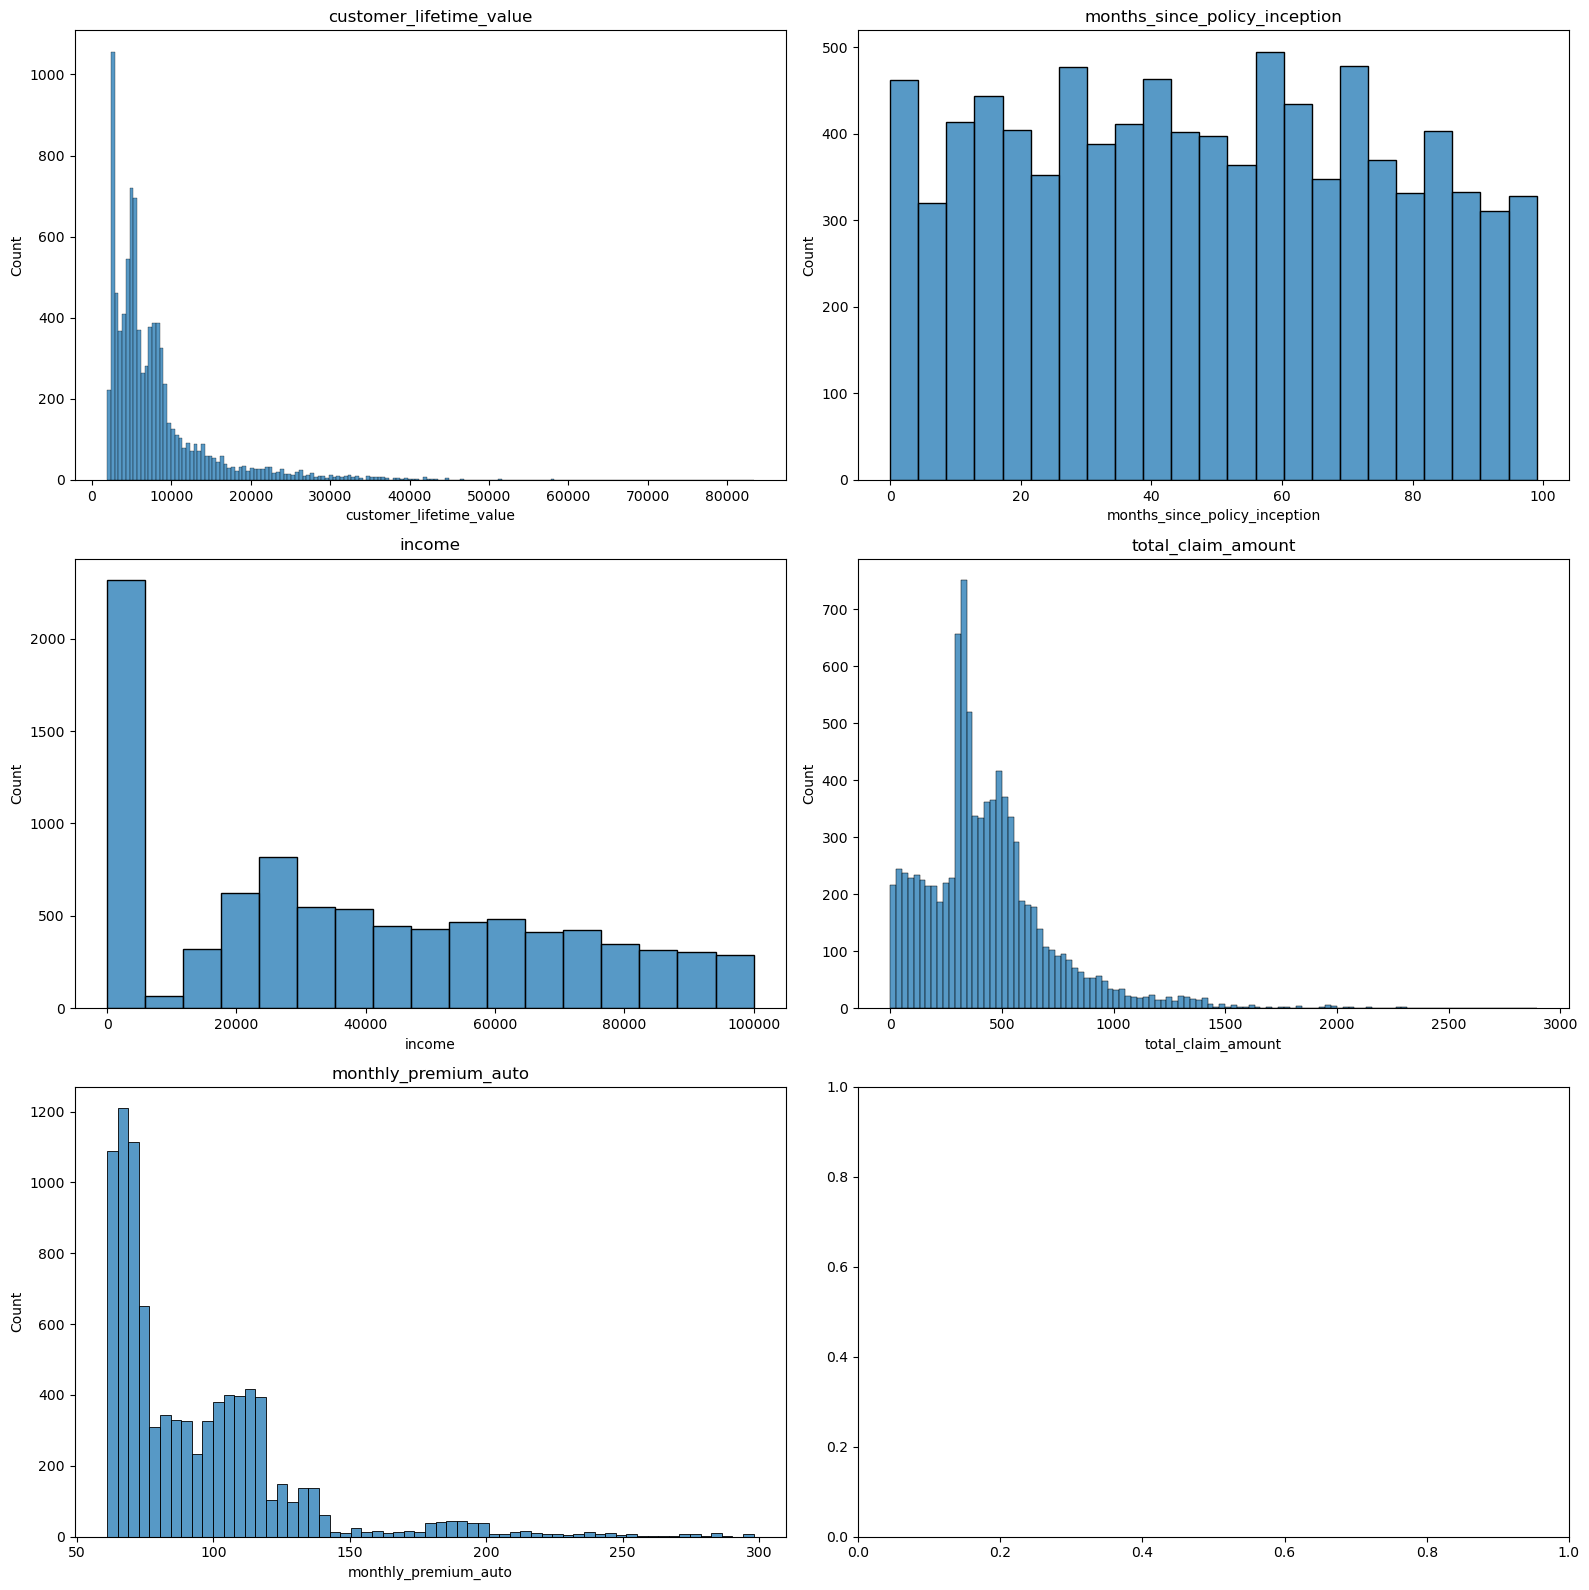

In [62]:

def histp(df,a,b):
    h=round(df.shape[1]/2+0.1)
    fig,ax=plt.subplots(h,2,figsize=(a,b))
    column_index = 0

    for c in range(2):
        for i in range(h):
            sx = sns.histplot(x=df[df.columns[column_index]], ax=ax[i,c])
            sx.set(title=df.columns[column_index])
            column_index += 1
            if column_index==df.shape[1]:
                break
    
    plt.tight_layout()
    plt.show()
    

histp(continuous_df,16,16)

According to the previous histogram plots, do you think that you will have to apply any transformation?


Yes, applying transformations will be necessary because there is some skewdness to the left on most columns

Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

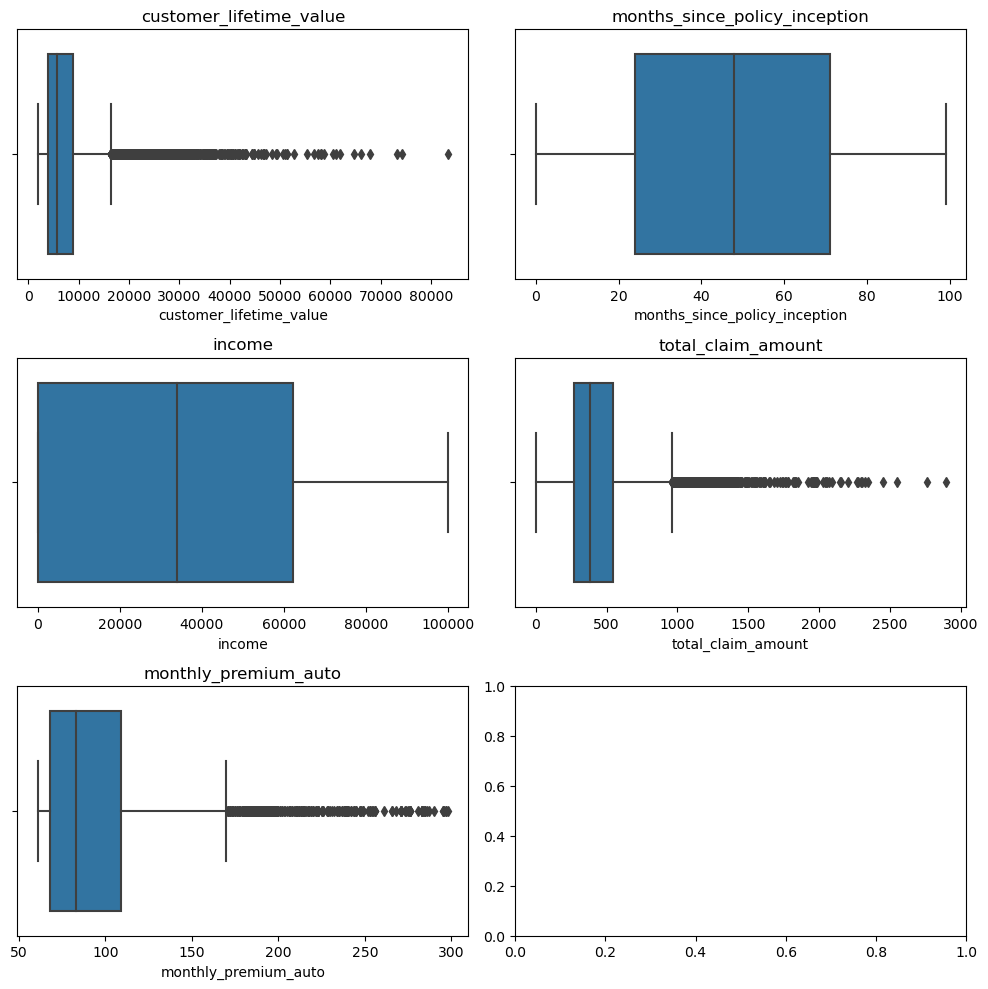

In [81]:
def boxp(df,a,b):
    h=round(df.shape[1]/2+0.1)
    fig,ax=plt.subplots(h,2,figsize=(a,b))
    column_index = 0

    for c in range(2):
        for i in range(h):
            sx = sns.boxplot(x=df[df.columns[column_index]], ax=ax[i,c])
            sx.set(title=df.columns[column_index])
            column_index += 1
            if column_index==df.shape[1]:
                break
    
    plt.tight_layout()
    plt.show()

boxp(continuous_df,10,10)